In [74]:
!pip install pandas openpyxl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel("Data/uncleaned bike sales data.xlsx")

df

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,22.0,December,2021,41,Adults (35-64),M,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1.0,1266,2320,1054,1266,2320
85,261779,2021-12-23,23.0,December,2021,30,Young Adults (25-34),F,United States,Oregon,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
86,261780,2021-12-23,23.0,December,2021,31,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
87,261781,2021-12-23,23.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1.0,295,540,245,295,540


# Pre-processing 

#### --> 1- Show all columns 

In [7]:
print(df.columns)


Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')


### --> 2- General info about the data

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order #        89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  88 non-null     float64       
 3   Month                89 non-null     object        
 4   Year                 89 non-null     int64         
 5   Customer_Age         89 non-null     int64         
 6   Age_Group            88 non-null     object        
 7   Customer_Gender      89 non-null     object        
 8   Country              89 non-null     object        
 9   State                89 non-null     object        
 10  Product_Category     89 non-null     object        
 11  Sub_Category         89 non-null     object        
 12  Product_Description  88 non-null     object        
 13  Order_Quantity       88 non-null     

### --> 3- Show summary statistics:
[mean, 
min,
max,
std,
25%,
50%,
75%]

In [9]:
df.describe()

,Sales_Order #,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,89.000000,89,88.000000,89.0,89.000000,88.000000,89.000000,89.000000,89.000000,89.000000,89.00000
mean,261738.067416,2021-12-13 10:31:00.674157312,13.534091,2021.0,34.202247,2.125000,1052.247191,1940.943820,1848.887640,2204.235955,4043.94382
min,261695.000000,2021-12-01 00:00:00,1.000000,2021.0,17.000000,1.000000,0.000000,0.000000,245.000000,0.000000,0.00000
25%,261716.000000,2021-12-08 00:00:00,8.750000,2021.0,30.000000,1.000000,420.000000,2295.000000,1043.000000,1252.000000,2295.00000
50%,261738.000000,2021-12-13 00:00:00,13.500000,2021.0,35.000000,2.000000,1252.000000,2295.000000,1054.000000,1266.000000,2320.00000
75%,261760.000000,2021-12-19 00:00:00,19.000000,2021.0,38.000000,3.000000,1266.000000,2320.000000,2954.000000,3756.000000,6750.00000
max,261782.000000,2021-12-24 00:00:00,24.000000,2021.0,63.000000,4.000000,1912.000000,3400.000000,5908.000000,7592.000000,13500.00000
std,25.729713,NaN,6.391353,0.0,8.090651,1.239322,440.499001,789.955743,1394.401162,1730.330926,3139.75858


### --> To know the miising values in my data we can use:


In [14]:
df.isnull()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
85,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##### Here because we have a large number of data it' diffeculte to reach the nissing values in this case we wiil use acommand to count the missing then use command to reach it exactlly in the row.

### 4- Check for missing values in each column

In [10]:
df.isnull().sum()

Sales_Order #          0
Date                   0
Day                    1
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         1
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

### 5- I want to know the total numbers of missing values in the data that i have it:

In [11]:
df.isnull().sum().sum()


np.int64(4)

### 6- I want to know where exactly the missing value in the row

In [12]:
df[df.isnull().any(axis=1)]

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
10,261704,2021-12-05,NaN,December,2021,42,Adults (35-64),M,Germany,Nordrhein-Westfalen,Bikes,Mountain Bikes,"Mountain-200 Black, 38",4.0,1252,2295,4172,5008,9180
15,261709,2021-12-06,6.0,December,2021,36,NaN,M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
21,261715,2021-12-08,8.0,December,2021,39,Adults (35-64),F,United States,Oregon,Bikes,Mountain Bikes,NaN,2.0,1252,2295,2086,2504,4590
22,261716,2021-12-08,8.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",NaN,295,540,245,0,0


### 7- i want to know the percentage of the missing values, this step will hellp me to handle missing data while i am starting cleaning the data.

In [13]:
(df.isnull().sum() / len(df)) * 100


Sales_Order #          0.000000
Date                   0.000000
Day                    1.123596
Month                  0.000000
Year                   0.000000
Customer_Age           0.000000
Age_Group              1.123596
Customer_Gender        0.000000
Country                0.000000
State                  0.000000
Product_Category       0.000000
Sub_Category           0.000000
Product_Description    1.123596
Order_Quantity         1.123596
 Unit_Cost             0.000000
 Unit_Price            0.000000
 Profit                0.000000
 Cost                  0.000000
Revenue                0.000000
dtype: float64

##### We can see here threir are columns that have missing values this command will lite me  know which columns have serious issues so, in this case to fix this issues maybe we will fill missing values, too much missing data? Maybe drop the column.

#### 8- If i want to delete or removes all rows that contain missing values (NaN) from my DataFrame we can use:

In [15]:
df.dropna()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,22.0,December,2021,41,Adults (35-64),M,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1.0,1266,2320,1054,1266,2320
85,261779,2021-12-23,23.0,December,2021,30,Young Adults (25-34),F,United States,Oregon,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
86,261780,2021-12-23,23.0,December,2021,31,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
87,261781,2021-12-23,23.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1.0,295,540,245,295,540


#### --> here we can see we have 85 row befor we have 89 row in my dataframe, so this commande will go throu the rows if we have any missing data in any column, this command will exclude that row — useful when we want to clean our data quickly. 

### 8- their is other way to delete the missing values by using:

In [16]:
df.dropna(axis =1)

,Sales_Order #,Date,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,December,2021,39,F,United States,California,Bikes,Mountain Bikes,1252,2295,4172,5008,9180
1,261695,2021-12-01,December,2021,44,M,United Kingdom,England,Bikes,Mountain Bikes,1266,2320,1054,1266,2320
2,261697,2021-12-02,December,2021,37,M,United States,California,Bikes,Mountain Bikes,420,769,698,840,1538
3,261698,2021-12-02,December,2021,31,F,Australia,New South Wales,Bikes,Mountain Bikes,420,769,349,420,769
4,261699,2021-12-03,December,2021,37,F,United States,California,Bikes,Mountain Bikes,0,2295,2086,0,4590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,December,2021,41,M,Germany,Hessen,Bikes,Mountain Bikes,1266,2320,1054,1266,2320
85,261779,2021-12-23,December,2021,30,F,United States,Oregon,Bikes,Mountain Bikes,1266,2320,1054,1266,2320
86,261780,2021-12-23,December,2021,31,F,Canada,British Columbia,Bikes,Mountain Bikes,1252,2295,1043,1252,2295
87,261781,2021-12-23,December,2021,35,F,United States,California,Bikes,Mountain Bikes,295,540,245,295,540


#### --> This command removes entire columns from the DataFrame df that contain any missing values (NaN).

### 9- we can use dropna to delete all missing value by:

In [17]:
df.dropna(how = 'all')

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,22.0,December,2021,41,Adults (35-64),M,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1.0,1266,2320,1054,1266,2320
85,261779,2021-12-23,23.0,December,2021,30,Young Adults (25-34),F,United States,Oregon,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
86,261780,2021-12-23,23.0,December,2021,31,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
87,261781,2021-12-23,23.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1.0,295,540,245,295,540


#### ---->This command removes only the rows where all values are missing..

### 10- we have command drops rows that have fewer than 1 non-missing (non-NaN) value.

In [20]:
df.dropna(thresh = 1, axis =1)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,22.0,December,2021,41,Adults (35-64),M,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1.0,1266,2320,1054,1266,2320
85,261779,2021-12-23,23.0,December,2021,30,Young Adults (25-34),F,United States,Oregon,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
86,261780,2021-12-23,23.0,December,2021,31,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
87,261781,2021-12-23,23.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1.0,295,540,245,295,540


#### 11- if we want to fill gaps in your data instead of dropping rows/columns.

In [ ]:
df.fillna(0)

### This command replaces all missing values (NaN) in the DataFrame df with 0.

### 12 -Filling with mean keeps your data balanced

In [ ]:
df.fillna(df.mean())

##### -->This command fills all missing values in numerical columns using the mean (average) value of each column.

### 13 -

In [22]:
df.fillna(df.mean(numeric_only =True)) ## median --> any skewnwss 

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,22.0,December,2021,41,Adults (35-64),M,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1.0,1266,2320,1054,1266,2320
85,261779,2021-12-23,23.0,December,2021,30,Young Adults (25-34),F,United States,Oregon,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
86,261780,2021-12-23,23.0,December,2021,31,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
87,261781,2021-12-23,23.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1.0,295,540,245,295,540


##### This command:

##### 1-Calculates the mean (average) of each numeric column only

##### 2-Fills all missing values (NaN) in those numeric columns with the respective mean

##### 3-Non-numeric columns are ignored

# duplicat

In [24]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 89, dtype: bool

This command checks for duplicate rows in your DataFrame df and returns a Boolean Series:

True for rows that are duplicates

False for unique rows (first occurrences)

In [28]:
df.drop_duplicates()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,22.0,December,2021,41,Adults (35-64),M,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1.0,1266,2320,1054,1266,2320
85,261779,2021-12-23,23.0,December,2021,30,Young Adults (25-34),F,United States,Oregon,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
86,261780,2021-12-23,23.0,December,2021,31,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
87,261781,2021-12-23,23.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1.0,295,540,245,295,540


In [31]:
df.drop_duplicates(subset =['Month'])

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
17,261711,2021-12-07,7.0,Decmber,2021,30,Young Adults (25-34),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 38",4.0,420,769,1396,1680,3076


<Axes: xlabel='Age_Group'>

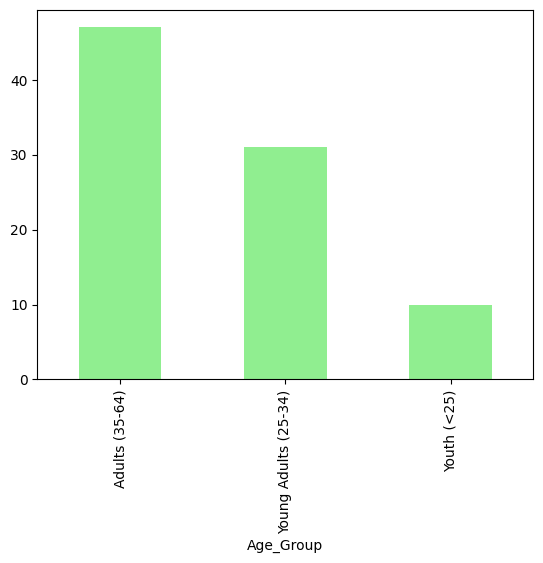

In [3]:
df['Age_Group'].value_counts().plot.bar(color ='lightgreen')

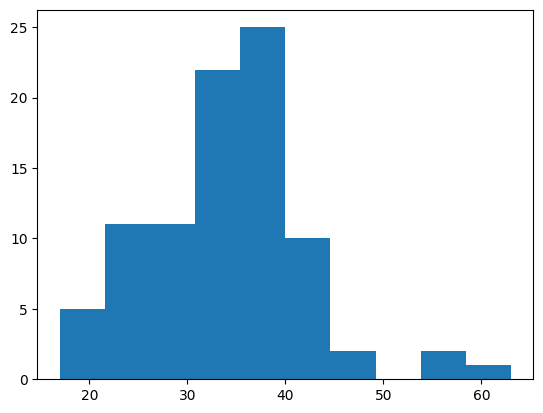

In [4]:
df['Customer_Age'].hist()
plt.grid(alpha=0)
plt.show()


In [8]:
df.columns

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')

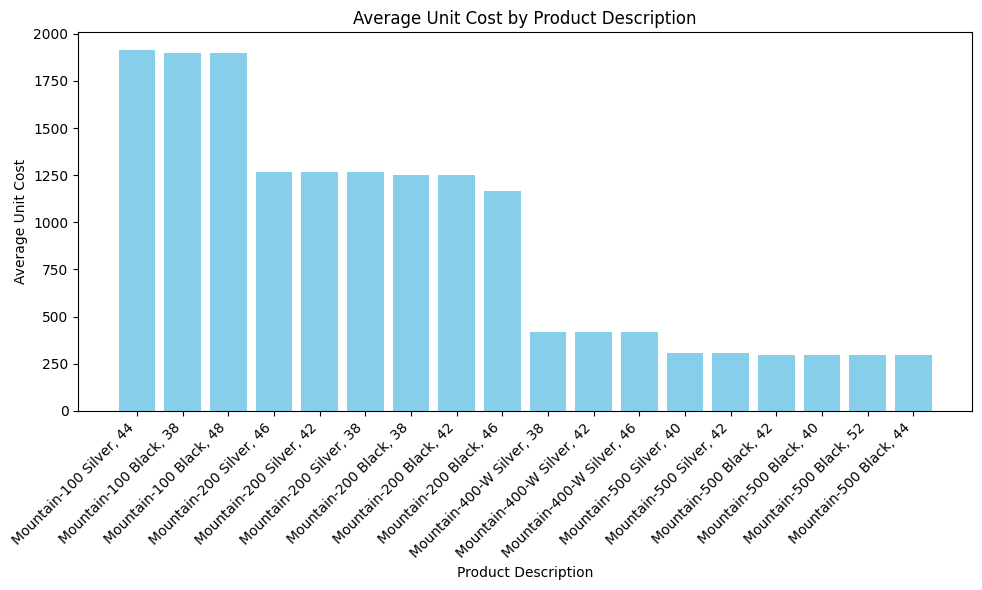

In [10]:

average_unit_cost = df.groupby('Product_Description')[' Unit_Cost '].mean().reset_index()


average_unit_cost = average_unit_cost.sort_values(by=' Unit_Cost ', ascending=False)



plt.figure(figsize=(10, 6))
plt.bar(average_unit_cost['Product_Description'], average_unit_cost[' Unit_Cost '], color='skyblue')
plt.xlabel('Product Description')
plt.ylabel('Average Unit Cost')
plt.title('Average Unit Cost by Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


<Axes: >

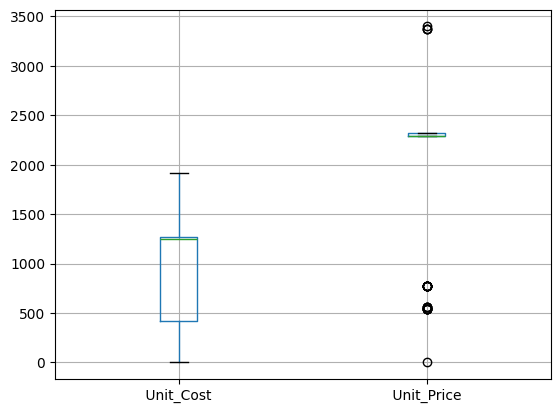

In [11]:
df.boxplot([' Unit_Cost ',' Unit_Price '])

In [16]:
print("The mean of the Unit_Price is: ", df[' Unit_Price '].mean())
print("The median of the Unit_Price is: ", df[' Unit_Price '].median())
print("The describe of the Unit_Price is:\n ", df[' Unit_Price '].describe())



The mean of the Unit_Price is:  1940.943820224719
The median of the Unit_Price is:  2295.0
The describe of the Unit_Price is:
  count      89.000000
mean     1940.943820
std       789.955743
min         0.000000
25%      2295.000000
50%      2295.000000
75%      2320.000000
max      3400.000000
Name:  Unit_Price , dtype: float64


In [17]:
non_integer_values = df[~df['Order_Quantity'].apply(float.is_integer)]
non_integer_values


,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
22,261716,2021-12-08,8.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",NaN,295,540,245,0,0


In [19]:
df.dropna(subset = ['Product_Description'])

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,22.0,December,2021,41,Adults (35-64),M,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1.0,1266,2320,1054,1266,2320
85,261779,2021-12-23,23.0,December,2021,30,Young Adults (25-34),F,United States,Oregon,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
86,261780,2021-12-23,23.0,December,2021,31,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
87,261781,2021-12-23,23.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1.0,295,540,245,295,540


In [22]:
missing_unit_cost = df[df[' Unit_Cost ']==0][' Unit_Price '] - (df[df[' Unit_Cost ']==0][' Profit ']/df[df[' Unit_Cost ']==0]['Order_Quantity'])
missing_unit_cost = missing_unit_cost.values[0]

np.float64(1252.0)

In [39]:
df.loc[df[' Unit_Price '] == 0, ' Unit_Price '] = missing_unit_cost
df

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295.0,4172,5008.0,9180.0
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320.0,1054,1266.0,2320.0
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769.0,698,840.0,1538.0
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769.0,349,420.0,769.0
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295.0,2086,0.0,4590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,22.0,December,2021,41,Adults (35-64),M,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1.0,1266,2320.0,1054,1266.0,2320.0
85,261779,2021-12-23,23.0,December,2021,30,Young Adults (25-34),F,United States,Oregon,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320.0,1054,1266.0,2320.0
86,261780,2021-12-23,23.0,December,2021,31,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295.0,1043,1252.0,2295.0
87,261781,2021-12-23,23.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1.0,295,540.0,245,295.0,540.0


In [26]:
df[df[' Cost ']== 0]

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295.0,2086,0,4590
22,261716,2021-12-08,8.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",NaN,295,540.0,245,0,0


In [29]:
df[' Cost ']= df[' Unit_Cost '] * df['Order_Quantity']
df[df[' Cost ']== 0]

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295.0,2086,0.0,4590.0


In [38]:
df['Revenue']= df[' Unit_Price '] * df['Order_Quantity']
df[df['Revenue']== 0]

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue


In [30]:
df[df['Age_Group'].isnull()]

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
15,261709,2021-12-06,6.0,December,2021,36,NaN,M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295.0,1043,1252.0,2295.0


In [31]:
df.Age_Group.unique()

array(['Adults (35-64)', 'Young Adults (25-34)', 'Youth (<25)', nan],
      dtype=object)

In [32]:
def set_age_group(age):
    if age < 25:
        return 'Youth (<25)'
    elif age < 35:
        return 'Young Adults (25-34)'
    else:
        return 'Adults (35-64)'

In [34]:
df['Age_Group'] = df['Customer_Age'].apply(set_age_group)

In [35]:
df[df['Age_Group'].isnull()]

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue


In [43]:
df.drop(columns=['Day', 'Month', 'Year'], inplace=True)
df

,Sales_Order #,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295.0,4172,5008.0,9180.0
1,261695,2021-12-01,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320.0,1054,1266.0,2320.0
2,261697,2021-12-02,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769.0,698,840.0,1538.0
3,261698,2021-12-02,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769.0,349,420.0,769.0
4,261699,2021-12-03,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295.0,2086,0.0,4590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,41,Adults (35-64),M,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1.0,1266,2320.0,1054,1266.0,2320.0
85,261779,2021-12-23,30,Young Adults (25-34),F,United States,Oregon,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320.0,1054,1266.0,2320.0
86,261780,2021-12-23,31,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295.0,1043,1252.0,2295.0
87,261781,2021-12-23,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1.0,295,540.0,245,295.0,540.0


In [44]:
df.isnull().sum()

Sales_Order #          0
Date                   0
Customer_Age           0
Age_Group              0
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         1
 Unit_Cost             0
 Unit_Price            1
 Profit                0
 Cost                  1
Revenue                2
dtype: int64

In [46]:
df[df['Product_Description'].isnull()]

,Sales_Order #,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
21,261715,2021-12-08,39,Adults (35-64),F,United States,Oregon,Bikes,Mountain Bikes,NaN,2.0,1252,2295.0,2086,2504.0,4590.0


In [47]:
df.Sub_Category.unique()

array(['Mountain Bikes'], dtype=object)

In [48]:
df.Product_Description.unique()

array(['Mountain-200 Black, 46', 'Mountain-200 Silver, 42',
       'Mountain-400-W Silver, 46', 'Mountain-400-W Silver, 42',
       'Mountain-200 Black, 38', 'Mountain-200 Silver, 38',
       'Mountain-200 Black, 42', 'Mountain-400-W Silver, 38',
       'Mountain-500 Silver, 42', nan, 'Mountain-500 Black, 42',
       'Mountain-100 Black, 38', 'Mountain-500 Black, 40',
       'Mountain-100 Silver, 44', 'Mountain-500 Silver, 40',
       'Mountain-200 Silver, 46', 'Mountain-500 Black, 44',
       'Mountain-100 Black, 48', 'Mountain-500 Black, 52'], dtype=object)

In [52]:
df[' Unit_Cost '].unique()

array([1252, 1266,  420,    0,  308,  295, 1898, 1912])

In [54]:
df.groupby(['Product_Description',' Unit_Price '])[' Unit_Price '].count()

Product_Description         Unit_Price 
Mountain-100 Black, 38     3375.0           2
Mountain-100 Black, 48     3375.0           1
Mountain-100 Silver, 44    3400.0           1
Mountain-200 Black, 38     2295.0          13
Mountain-200 Black, 42     2295.0           7
Mountain-200 Black, 46     2295.0          15
Mountain-200 Silver, 38    2320.0          14
Mountain-200 Silver, 42    2320.0           9
Mountain-200 Silver, 46    2320.0           4
Mountain-400-W Silver, 38  769.0            2
Mountain-400-W Silver, 42  769.0            3
Mountain-400-W Silver, 46  769.0            6
Mountain-500 Black, 40     540.0            2
Mountain-500 Black, 42     540.0            2
Mountain-500 Black, 44     540.0            1
Mountain-500 Black, 52     540.0            1
Mountain-500 Silver, 40    565.0            1
Mountain-500 Silver, 42    565.0            3
Name:  Unit_Price , dtype: int64

In [56]:
df.dropna(inplace = True)
df

,Sales_Order #,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295.0,4172,5008.0,9180.0
1,261695,2021-12-01,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320.0,1054,1266.0,2320.0
2,261697,2021-12-02,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769.0,698,840.0,1538.0
3,261698,2021-12-02,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769.0,349,420.0,769.0
4,261699,2021-12-03,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295.0,2086,0.0,4590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,41,Adults (35-64),M,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1.0,1266,2320.0,1054,1266.0,2320.0
85,261779,2021-12-23,30,Young Adults (25-34),F,United States,Oregon,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320.0,1054,1266.0,2320.0
86,261780,2021-12-23,31,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295.0,1043,1252.0,2295.0
87,261781,2021-12-23,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1.0,295,540.0,245,295.0,540.0


In [58]:
df.isnull().sum()

Sales_Order #          0
Date                   0
Customer_Age           0
Age_Group              0
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    0
Order_Quantity         0
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

In [59]:
df.describe()

,Sales_Order #,Date,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,86.000000,86,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,261739.011628,2021-12-13 16:11:09.767441920,34.174419,2.104651,1066.081395,1975.686047,1870.046512,2232.476744,4131.639535
min,261695.000000,2021-12-01 00:00:00,17.000000,1.000000,0.000000,540.000000,245.000000,0.000000,540.000000
25%,261718.250000,2021-12-09 06:00:00,29.250000,1.000000,1252.000000,2295.000000,1043.000000,1252.000000,2295.000000
50%,261739.500000,2021-12-14 00:00:00,35.000000,2.000000,1252.000000,2295.000000,1054.000000,1266.000000,2320.000000
75%,261760.750000,2021-12-19 00:00:00,38.000000,3.000000,1266.000000,2320.000000,3085.250000,3756.000000,6851.250000
max,261782.000000,2021-12-24 00:00:00,63.000000,4.000000,1912.000000,3400.000000,5908.000000,7592.000000,13500.000000
std,25.635680,NaN,8.207876,1.236970,434.483391,758.912384,1406.835907,1742.830839,3132.082299


In [63]:
df[df.duplicated(subset = ['Sales_Order #', 'Customer_Age'], keep = False )]

,Sales_Order #,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
6,261701,2021-12-03,37,Adults (35-64),M,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1.0,1252,2295.0,1043,1252.0,2295.0
7,261701,2021-12-03,37,Adults (35-64),M,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1.0,1252,2295.0,1043,1252.0,2295.0


In [65]:
df.Country.unique()

array(['United States', 'United Kingdom', ' United States', 'Australia',
       'United  States', 'United States ', 'Germany', 'Canada', 'France'],
      dtype=object)

In [66]:
df['Country']=df.Country.str.strip()
df.Country.str.replace('  ',' ')

array(['United States', 'United Kingdom', 'Australia', 'United  States',
       'Germany', 'Canada', 'France'], dtype=object)

In [67]:
df.Country.unique()

array(['United States', 'United Kingdom', ' United States', 'Australia',
       'United  States', 'United States ', 'Germany', 'Canada', 'France'],
      dtype=object)

In [70]:
df.drop_duplicates(inplace = True)